###Réalisé par:
- Raja BEN HARRAF


#Reconnaissance manuscrite des caractéres tifinagh à l'aide de reseaux de neurones convolution profond


###Introduction: 
Le tifinagh est l’écriture utilisée par les Berbères pour écrire leur langue, le tamazight. Elle est dérivée des écritures originelles des langues berbères.
La reconnaissance des caractères manuscrits est une tâche difficile en raison de la diversité des styles d'écriture. Dans le présent document, nous avons realisé un système de reconnaissance basé sur des réseaux de neurones à convolution profonde (CNN)

### Liaison avec  Google Drive comme source de donnees 

In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive"

MyDrive


In [ ]:
!unzip  /content/gdrive/MyDrive/Tifinagh.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: amhcd_64/AMHCD_64/yax/yax_515.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_516.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_517.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_518.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_519.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_52.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_520.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_521.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_522.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_523.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_524.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_525.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_526.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_527.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_528.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_529.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_53.jpeg  
  inflating: amhcd_64/AMHCD_64/yax/yax_530.jpeg  
  inflating: amhcd_64/AM

In [ ]:
# Importation des bibliothèques
import os
import numpy as np
import cv2 as cv
import random
import pickle
import time
from datetime import timedelta
import math

###CNN: 
Le CNN est considéré comme un type spécialisé de réseaux de neurones qui met à jour les poids à chaque couche de la hiérarchie visuelle pendant la formation via un mécanisme de rétropropagation

In [ ]:
# CNN
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [ ]:
# graph
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# matrice de conf
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

###Chargement de Dataset


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/AMHCD_64/AMHCD_64',
  validation_split=0.2,
  subset="training",
  label_mode="categorical",
  seed=123,
  image_size=(32, 32))

Found 25740 files belonging to 33 classes.
Using 20592 files for training.


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  # There is no graph to add in eager mode.


In [ ]:
class_names = train_ds.class_names
print(len(class_names))

33


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/AMHCD_64/AMHCD_64',
  validation_split=0.2,
  subset="validation",
  label_mode="categorical",
  seed=123,
  image_size=(32, 32))

Found 25740 files belonging to 33 classes.
Using 5148 files for validation.


In [ ]:
class_names = val_ds.class_names
print(len(class_names))

33


### Les données d'entrainement

In [ ]:
num_classes = 33
from tensorflow.keras import layers
from tensorflow.keras import activations

model = tf.keras.Sequential([
     layers.Input((32,32,3)),
     layers.Conv2D(32, (3,3), activation='relu'),
     layers.Conv2D(32, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Dropout(0.5),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(33,activation='softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

### Le résumé des paramètres d'architecture proposés

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=40
)

Epoch 1/40
644/644 [==============================] - 34s 40ms/step - loss: 3.8057 - accuracy: 0.1922 - val_loss: 1.4893 - val_accuracy: 0.6665
Epoch 2/40
644/644 [==============================] - 21s 33ms/step - loss: 1.0324 - accuracy: 0.6968 - val_loss: 0.6502 - val_accuracy: 0.8559
Epoch 3/40
644/644 [==============================] - 21s 33ms/step - loss: 0.5411 - accuracy: 0.8385 - val_loss: 0.3504 - val_accuracy: 0.9382
Epoch 4/40
644/644 [==============================] - 21s 32ms/step - loss: 0.3472 - accuracy: 0.8940 - val_loss: 0.2121 - val_accuracy: 0.9567
Epoch 5/40
644/644 [==============================] - 21s 33ms/step - loss: 0.2725 - accuracy: 0.9164 - val_loss: 0.1549 - val_accuracy: 0.9610
Epoch 6/40
644/644 [==============================] - 21s 33ms/step - loss: 0.2267 - accuracy: 0.9322 - val_loss: 0.1340 - val_accuracy: 0.9703
Epoch 7/40
644/644 [==============================] - 21s 33ms/step - loss: 0.2215 - accuracy: 0.9338 - val_loss: 0.1312 - val_accuracy:

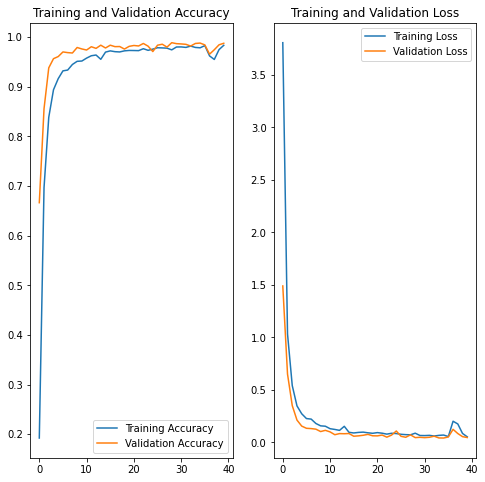

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Tester le modéle avec 

In [ ]:
image_path = "yo.jpg"
img = tf.keras.utils.load_img(
    image_path, target_size=(32,32)
)

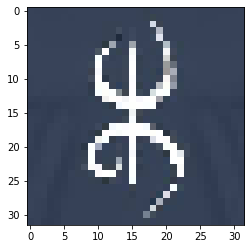

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} % percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to yaf with a 7.83 % percent confidence.


##Matrice de confusion

In [ ]:
X_train=[]
y_train=[]
for images, labels in train_ds.unbatch():
  X_train.append(images.numpy())
  y_train.append(labels.numpy())

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(20592, 32, 32, 3)

In [ ]:
y_train.shape

(20592, 33)

In [ ]:
X_test=[]
y_test=[]
for images, labels in val_ds.unbatch():
  X_test.append(images.numpy())
  y_test.append(labels.numpy())

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape

(5148, 32, 32, 3)

In [ ]:
y_test.shape

(5148, 33)

In [ ]:
y_pred = model.predict(val_ds)

161/161 [==============================] - 2s 12ms/step


In [ ]:
y_pred.shape

(5148, 33)

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [ ]:
!pip install fidle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


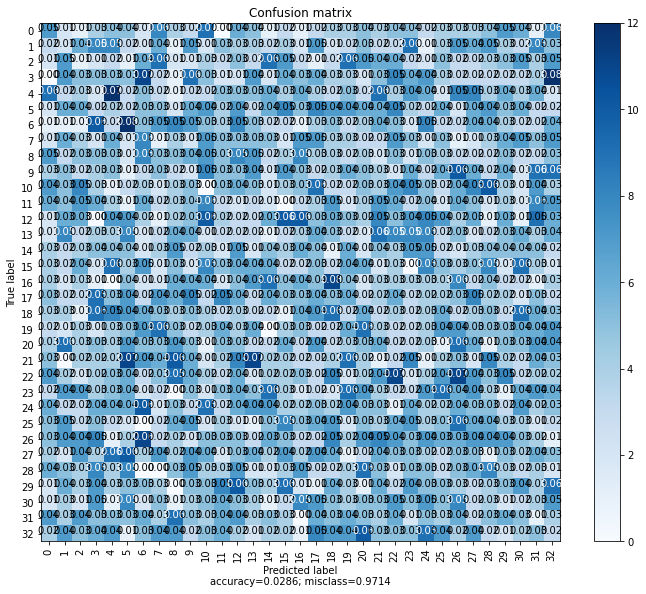

In [ ]:
import fidle
fidle.scrawler.confusion_matrix(y_test,y_pred,range(33))